# 最小二乘法

最小二乘的概念是从 19 世纪早期 高斯 和 勒让德 的开拓性工作开始的，它的应用遍及现代统计学和数学建模。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 问题

假设我们有一些观测值 $(x, y)$，以及看起来它们是线性的，所以我们假设它服从 $y = wx + b$，最小二乘法的作用就是可以求出误差最小的 $w$ 和 $b$ 的值；

求出直线的过程就是线性回归；

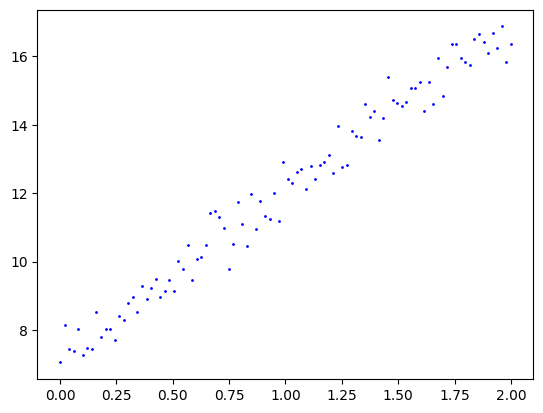

In [2]:
# 我们需要求得的值
W = 5 # 假设的权重，或者斜率
B = 7 # 假设的偏置，或者截距

N = 100 # 观测的样本数量

# X 的取值，一般也可以认为是时间，随着时间的推移
X = np.linspace(0, 2, N) 

# 我们观测到具体的值，当然我们的观测有一些误差
Y = X * W + B + np.random.randn(N) * 0.5 

# 然后画出来散列的点
ax = plt.figure().add_subplot()
ax.scatter(X, Y, s = 1, c='blue')
plt.show()

现在我们希望找到 $y = wx + b$，这样我们寄希望于没有观测到的点也服从这个等式，我们就可以对它进行预测。

求解直线只需要两个不重合的点就可以，一个相当简单的处理方式是，随机找两个点，但是由于我们的测量是有误差的，所以随机找两个点或者目测找点的方式一般不是最好的。

下面假设我们选择开始的点和结束的点，来做一次尝试；

In [3]:
import sympy
sympy.init_printing()

In [4]:
x, y = sympy.symbols("x y")
x, y

写出两点式方程，进行简化并求解 y 的表达式

In [5]:
eq = sympy.Eq(
    (y - Y[0]) / (Y[-1] - Y[0]),
    (x - X[0]) / (X[-1] - X[0])
)
eq.simplify()
fx = sympy.solve(eq, y)[0]
fx

然后画出我们随便找的直线，看起来还不错；

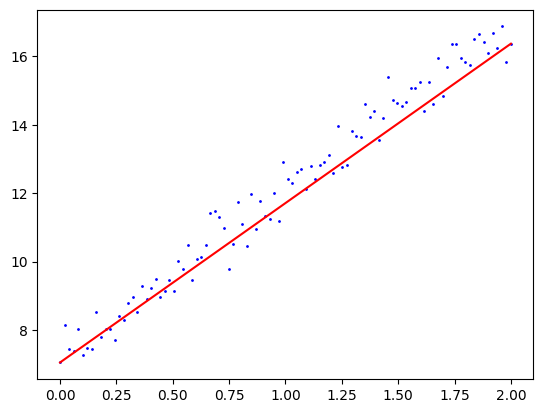

In [6]:
ax = plt.figure().add_subplot()
ax.scatter(X, Y, s = 1, c='blue')
ax.plot(X, sympy.lambdify(x, fx, 'numpy')(X), c='red')
plt.show()

## 最小二乘法

上面的方式虽然简单，但是显然不是最优解，我们还是更希望找到一条直线，能够尽可能地减少预测的误差。但是显然上面的点不都在一条直线上，所以由这些点组成的方程组称为 **不相容方程组**，就是所有这些方程组是解不出 $w, b$ 的。

In [7]:
# 定义符号
x, y, i, w, b, n = sympy.symbols('x, y, i, w, b, n')
x, y, i, w, b, n


我们希望求得的 $w$ 和 $b$ 经过 $w * x + b$ 求得的值和 $y$ 越接近越好

于是我们希望 $w * x + b - y$ 的绝对值越小越好

等价于我们希望 $(w * x + b - y)^2$ 的值越小越好

当然，我们希望求得的值对所有的样本都好，于是就有了下面的式子，我们希望的到它的最小值，期望它接近于 0，这个式子就是 **均方误差 (Mean Squared Error)**

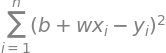

In [8]:
l = sympy.Sum((sympy.Indexed(x, i) * w + b - sympy.Indexed(y, i) ) ** 2, (i, 1, n))
l

一个朴素的想法是，对其求导，令导函数等于 0，求解 $w, b$

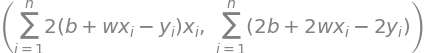

In [9]:
dw = sympy.diff(l, w)
db = sympy.diff(l, b)

dw, db

令导函数等于 0

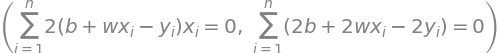

In [10]:
eq1 = sympy.Eq(dw, 0)
eq2 = sympy.Eq(db, 0)
eq1, eq2

这两个式子中的 2 可以约掉，所以很多时候均方误差会表示成：

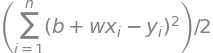

In [11]:
l / 2

尝试求解 $w, b$

In [12]:
sympy.solve([eq1, eq2], (w, b))

很遗憾 `sympy` 解不出来，于是我们手动求解下面的方程组：

$
\begin{cases}
\displaystyle \sum_{i = 1}^n bx_i + wx_i^2 - y_ix_i = 0 & \\
\displaystyle\sum_{i = 1}^n b + wx_i - y_i = 0 & \\
\end{cases}
$

---

记 $\bar{x} = {1 \over n}\sum_{i = 1}^n x_i$ 为 $x$ 的平均数；

记 $\bar{y} = {1 \over n}\sum_{i = 1}^n y_i$ 为 $y$ 的平均数；

---

首先通过第二个式子计算 $b$

$
\begin{aligned}
& nb + w\sum_{i = 1}^n x_i - \sum_{i = 1}^n y_i = 0 \\
& nb + wn\bar{x} - n\bar{y} = 0 \\
& b = \bar{y} - w \bar{x} \\
\end{aligned}
$

---

然后我们处理第一个式子：

$
\begin{aligned}
& b \sum_{i = 1}^n x_i + w \sum_{i = 1}^n x_i^2 - \sum_{i = 1}^n x_iy_i = 0 \\
& (\overline{y} - w \overline{x}) \sum_{i = 1}^n x_i + w \sum_{i = 1}^n x_i^2 - \sum_{i = 1}^n x_iy_i = 0 \\
& w(\sum_{i = 1}^n x_i^2 - \overline{x} \sum_{i = 1}^n x_i)  = \sum_{i = 1}^n x_iy_i - \overline{y} \sum_{i = 1}^n x_i \\
& w  = {\displaystyle \sum_{i = 1}^n x_iy_i - \overline{y} \sum_{i = 1}^n x_i \over\displaystyle \sum_{i = 1}^n x_i^2 - \overline{x} \sum_{i = 1}^n x_i}
\end{aligned}
$

然后很容易计算出：

In [13]:
w = (
    (X * Y).sum() - Y.mean() * X.sum()
) / (
    (X ** 2).sum() - X.mean() * X.sum()
)
w

In [14]:
b = Y.mean() - w * X.mean()
b

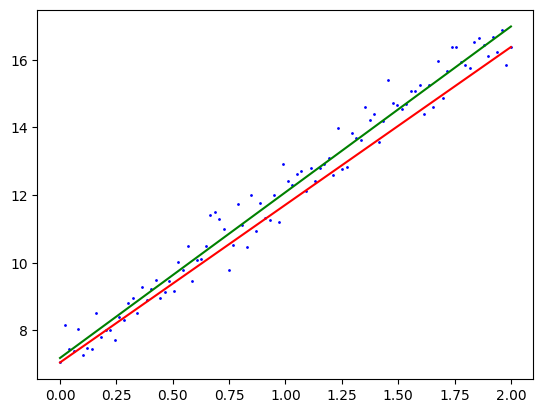

In [15]:
ax = plt.figure().add_subplot()
ax.scatter(X, Y, s = 1, c='blue')
ax.plot(X, sympy.lambdify(x, fx, 'numpy')(X), c='red')
ax.plot(X, X * w + b, c='green')
plt.show()

这样，我们就找到了一条相当好的直线，当然现实中的的 $x$ 是个向量，我们可以将其扩展到多变量的情况，这个以后再说吧。

## 参考

- [1] 索尔. 数值分析[M/OL]. 吴兆金, 王国英, 范红军, 译. <a href="https://book.douban.com/press/2609">人民邮电出版社</a><span><span class="pl"> 译者</span>: <a class="" href="/search/%E5%90%B4%E5%85%86%E9%87%91">吴兆金</a>                   /                <a class="" href="/search/%E7%8E%8B%E5%9B%BD%E8%8B%B1">王国英</a>                   /                <a class="" href="/search/%E8%8C%83%E7%BA%A2%E5%86%9B">范红军</a>    </span>, 2010. https://book.douban.com/subject/4188358/.
- [1] 周志华. 机器学习[M/OL]. <a href="https://book.douban.com/press/2562">清华大学出版社</a><span class="pl">出版年:</span> 2016-1-1, 2016. https://book.douban.com/subject/26708119/.
